#### 결합 엔트로피

- 결합확률분포를 사용하여 정의한 엔트로피를 말한다.

#### 조건부엔트로피

- 어떤확률 변수 X가 다른 확률변수 Y의 값을 예측하는데 도움이 되는지를 측정하는 방법 중의 하나
- X의 값이 어떤 특정한 값을 가질때 Y도 마찬가지로 특정한 값이 된다면 X로 Y를 예측할 수 있다.
- X의 값이 어떤 특정한 값을 가질때 Y가 골고루 분포가 되어 있다면 X로 Y를 예측하는데 도움이 안된다.


In [12]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1,2])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


In [20]:
iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target[idx]
df.tail()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


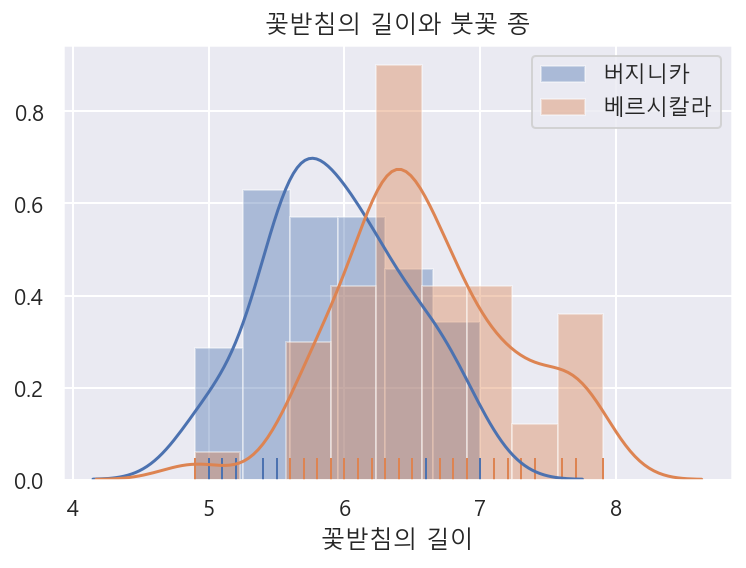

In [5]:
sns.distplot(df[df.species == 1]["sepal length (cm)"], hist=True, rug=True, label="버지니카")
sns.distplot(df[df.species == 2]["sepal length (cm)"], hist=True, rug=True, label="베르시칼라")
plt.legend()
plt.xlabel("꽃받침의 길이")
plt.title("꽃받침의 길이와 붓꽃 종")
plt.show()


In [6]:
df["X1"] = df["sepal length (cm)"] > 6
pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
pivot_table1

species,1,2
X1,,
False,30,9
True,20,41


In [34]:
df["X1"] = df["sepal length (cm)"] > 6
pivot_table = df.groupby(["X1", "species"]).size()
pivot_table.unstack()

species,1,2
X1,,
False,30,9
True,20,41


In [8]:
import scipy as sp
def cond_entropy(v):
    eps = np.finfo("float").eps
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

cond_entropy(pivot_table1.values)

0.860714271586387

In [9]:
df["X2"] = df["sepal length (cm)"] > 6.5
pivot_table2 = df.groupby(["X2", "species"]).size().unstack()
pivot_table2

species,1,2
X2,,
False,42,28
True,8,22


In [10]:
cond_entropy(pivot_table2.values)

0.9306576387006182